# MAIN


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import platform
import warnings
import pickle
import re


In [ ]:
df = pd.read_csv('/content/real_df.csv')

In [ ]:
df.head()

Unnamed: 0                publishedAt  \
0           0  2020-10-02 17:58:34+00:00   
1           1  2020-10-03 13:50:10+00:00   
2           2  2020-12-08 16:31:39+00:00   
3           3  2022-11-05 19:46:32+00:00   
4           4  2021-04-23 16:07:59+00:00   

                                          title     video_id  view_count  \
0              Ïú†ÌäúÎ∏å Íµ¨ÎèÖÏûê Ï¥ùÌï© 400ÎßåÎ™Ö Ìï©Î∞© - 20ÎÖÑ 8Ïõî Ìï´ÌÅ¥Î¶Ω  -DxQoygYvCM      645910   
1   Ï¥àÎî©Î≥¥Îã§ Îçî ÏàúÏàòÌïú 40ÎåÄÎì§? - 40ÎåÄÎì§Î°ú Ïñ¥Î™ΩÏñ¥Ïä§Î•º Ìï¥Î¥§Îã§! ÌãÄÎ™ΩÏñ¥Ïä§ 2Ìôî  -RLpSquZVn0      674278   
2                        Î®∏Î¶¨Ïπ¥ÎùΩ ÏûêÎ•¥Î†§Îã§ ÏÜêÎãò Î®∏Î¶¨ ÌÑ∞Ìä∏Î†∏ÏäµÎãàÎã§  -QcILzXFrOE      831877   
3  ÎßåÌôîÏ±ÖÏùÑ Î≥¥Í≥† Í≥ÑÏã†Í≤å ÏïÑÎãàÎùº ÎßàÏù∏ÌÅ¨ÎûòÌîÑÌä∏ ÏûÖÎãàÎã§. -  ÎàïÌîÑÎ°úÌï¥Ïª§ ÏõêÌéÄÎß® Í∞ÄÎ°úÏö∞  -EZvzGoHMN8     1001431   
4                                Ïô∏Íµ≠Ïù∏Îì§ÏóêÍ≤å ÎÇ©ÏπòÎãπÌñàÏäµÎãàÎã§  -AfRi16kCIs      412647   

   like_count  comment_count   channel playlist_title        date  year  hour  \
0       10676            967  Ïö∞ÏôÅÍµ≥ÏùòÍ≤åÏûÑÎ∞©ÏÜ°      Ìï´ÌÅ¥Î¶Ω,ÌïòÏù¥ÎùºÏù¥Ìä∏  2020-10-02  2020    17   
1       12245           1256  Ïö∞ÏôÅÍµ≥ÏùòÍ≤åÏûÑÎ∞©ÏÜ°  Ìï©Î∞©,ÏãúÎ¶¨Ï¶à,Í∏∞ÌÉÄ Ïª®ÌÖêÏ∏†  2020-10-03  2020    13   
2       16272           1837  Ïö∞ÏôÅÍµ≥ÏùòÍ≤åÏûÑÎ∞©ÏÜ°          Î®πÎ∞©/Ï∫†Î∞©  2020-12-08  2020    16   
3       15159            702  Ïö∞ÏôÅÍµ≥ÏùòÍ≤åÏûÑÎ∞©ÏÜ°             ÎßàÌÅ¨  2022-11-05  2022    19   
4        8330            703  Ïö∞ÏôÅÍµ≥ÏùòÍ≤åÏûÑÎ∞©ÏÜ°             Îò•Í≤ú  2021-04-23  2021    16   

   Duration  seconds  
0  PT10M11S      611  
1  PT18M27S     1107  
2  PT14M17S      857  
3  PT11M37S      697  
4  PT11M18S      678


* 5Î∂Ñ_20Î∂ÑÏßúÎ¶¨ Í≤åÏûÑ ÏòÅÏÉÅ ÌïòÎÇòÏóê 20~30Îßå Ïõê
* ÏáºÏ∏†Ïùò Í≤ΩÏö∞ ÎßåÏõê~2ÎßåÏõê , 2ÎßåÏõêÏúºÎ°ú ÌÜµÏùºÌïòÏûê
* ÏÉÅÌô©Í∑πÏùò Í≤ΩÏö∞ Í±∞Ïùò ÌíÄÏòÅÏÉÅÏúºÎ°ú ÎÇòÏò§Îäî Í≤ΩÏö∞Í∞Ä ÎßéÏúºÎØÄÎ°ú / 1.5 Ìï¥Ï§¨Îã§

In [ ]:
df

Unnamed: 0                publishedAt  \
0              0  2020-10-02 17:58:34+00:00   
1              1  2020-10-03 13:50:10+00:00   
2              2  2020-12-08 16:31:39+00:00   
3              3  2022-11-05 19:46:32+00:00   
4              4  2021-04-23 16:07:59+00:00   
...          ...                        ...   
2113        2189  2021-07-15 10:30:11+00:00   
2114        2190  2021-09-15 10:33:22+00:00   
2115        2191  2021-04-28 05:36:41+00:00   
2116        2192  2023-01-18 16:31:08+00:00   
2117        2193  2022-05-11 18:58:27+00:00   

                                             title     video_id  view_count  \
0                 Ïú†ÌäúÎ∏å Íµ¨ÎèÖÏûê Ï¥ùÌï© 400ÎßåÎ™Ö Ìï©Î∞© - 20ÎÖÑ 8Ïõî Ìï´ÌÅ¥Î¶Ω  -DxQoygYvCM      645910   
1      Ï¥àÎî©Î≥¥Îã§ Îçî ÏàúÏàòÌïú 40ÎåÄÎì§? - 40ÎåÄÎì§Î°ú Ïñ¥Î™ΩÏñ¥Ïä§Î•º Ìï¥Î¥§Îã§! ÌãÄÎ™ΩÏñ¥Ïä§ 2Ìôî  -RLpSquZVn0      674278   
2                           Î®∏Î¶¨Ïπ¥ÎùΩ ÏûêÎ•¥Î†§Îã§ ÏÜêÎãò Î®∏Î¶¨ ÌÑ∞Ìä∏Î†∏ÏäµÎãàÎã§  -QcILzXFrOE      831877   
3     ÎßåÌôîÏ±ÖÏùÑ Î≥¥Í≥† Í≥ÑÏã†Í≤å ÏïÑÎãàÎùº ÎßàÏù∏ÌÅ¨ÎûòÌîÑÌä∏ ÏûÖÎãàÎã§. -  ÎàïÌîÑÎ°úÌï¥Ïª§ ÏõêÌéÄÎß® Í∞ÄÎ°úÏö∞  -EZvzGoHMN8     1001431   
4                                   Ïô∏Íµ≠Ïù∏Îì§ÏóêÍ≤å ÎÇ©ÏπòÎãπÌñàÏäµÎãàÎã§  -AfRi16kCIs      412647   
...                                            ...          ...         ...   
2113           Ïó≠ÎåÄ Í≥®ÌîÑ Í≤åÏûÑ Ï§ë Í∞ÄÏû• Ïû¨Î∞åÏùå! ÎßàÎ¶¨Ïò§ Í≥®ÌîÑ. Í≤úÏä§ÌÑ∞ Î©§Î≤ÑÎì§Í≥º  _8wAmpRnwHg      137290   
2114                   VRÏ±óÏóêÏÑú Í≥†Î©§Îì§Í≥º ÏàòÎèôÏúºÎ°ú „Öã„Öã Í∞àÌã±Ìè∞ ÌïòÍ∏∞ !  _8mD_d8XXY4      858965   
2115                                     ÌãÄÎî± Í≤åÏûÑ ÏõîÎìúÏªµ  _8JbS6ZLzS8      168777   
2116                        GTA5 ÌôîÏóºÎ≥ë vs Í∞úÎèå #Shorts  _-5BHmnOMXw      454195   
2117  Ïã§Ï†ú ÏÇ¨ÎûåÎì§ÏùÑ ÏÑ≠Ïô∏Ìï¥ÏÑú ÎØ∏Ïó∞ÏãúÎ•º ÌïúÎã§Î©¥ ?? Í≤åÏûÑÏù¥ ÏïÑÎãôÎãàÎã§  - VRÏ±ó ÏÉÅÌô©Í∑π  _2g-tpf50mw      329892   

      like_count  comment_count     channel        playlist_title        date  \
0          10676            967    Ïö∞ÏôÅÍµ≥ÏùòÍ≤åÏûÑÎ∞©ÏÜ°             Ìï´ÌÅ¥Î¶Ω,ÌïòÏù¥ÎùºÏù¥Ìä∏  2020-10-02   
1          12245           1256    Ïö∞ÏôÅÍµ≥ÏùòÍ≤åÏûÑÎ∞©ÏÜ°         Ìï©Î∞©,ÏãúÎ¶¨Ï¶à,Í∏∞ÌÉÄ Ïª®ÌÖêÏ∏†  2020-10-03   
2          16272           1837    Ïö∞ÏôÅÍµ≥ÏùòÍ≤åÏûÑÎ∞©ÏÜ°                 Î®πÎ∞©/Ï∫†Î∞©  2020-12-08   
3          15159            702    Ïö∞ÏôÅÍµ≥ÏùòÍ≤åÏûÑÎ∞©ÏÜ°                    ÎßàÌÅ¨  2022-11-05   
4           8330            703    Ïö∞ÏôÅÍµ≥ÏùòÍ≤åÏûÑÎ∞©ÏÜ°                    Îò•Í≤ú  2021-04-23   
...          ...            ...         ...                   ...         ...   
2113        1224            192  waktaverse        Ïö∞ÏôÅÍµ≥Ïùò ÌíÄÏóÖÎ°úÎëê : Îò•Í≤ú  2021-07-15   
2114       12670            649    Ïö∞ÏôÅÍµ≥ÏùòÍ≤åÏûÑÎ∞©ÏÜ°                vrchat  2021-09-15   
2115        1812            295  waktaverse  Ïö∞ÏôÅÍµ≥Ïùò ÌíÄÏóÖÎ°úÎëê : ÎÖ∏Í∞ÄÎ¶¨ & Í∏∞ÌÉÄ  2021-04-28   
2116       12340            157    Ïö∞ÏôÅÍµ≥ÏùòÍ≤åÏûÑÎ∞©ÏÜ°                shorts  2023-01-18   
2117        6085            615    Ïö∞ÏôÅÍµ≥ÏùòÍ≤åÏûÑÎ∞©ÏÜ°                vrchat  2022-05-11   

      year  hour    Duration  seconds        cost  
0     2020    17    PT10M11S      611   101833.33  
1     2020    13    PT18M27S     1107   184500.00  
2     2020    16    PT14M17S      857   142833.33  
3     2022    19    PT11M37S      697   116166.67  
4     2021    16    PT11M18S      678   113000.00  
...    ...   ...         ...      ...         ...  
2113  2021    10  PT2H22M21S     8541  1423500.00  
2114  2021    10    PT12M53S      773   128833.33  
2115  2021     5     PT57M3S     3423   570500.00  
2116  2023    16       PT37S       37     6166.67  
2117  2022    18    PT37M41S     2261   376833.33  

[2118 rows x 15 columns]

In [ ]:
df['cost'] = df.apply(lambda row: 20000 if row['playlist_title'] == 'shorts' else (row['seconds'] / 60 ) * 15000 ,axis=1)
df['cost'] = df['cost'].apply(lambda x: '{:.2f}'.format(x))


In [ ]:
df = df.dropna(subset=['playlist_title'])

In [ ]:
df.loc[df['playlist_title'].str.contains('ÌíÄÏóÖÎ°úÎëê|ÌíÄÏòÅÏÉÅ', case=False, regex=True), 'cost'] = 0
df['cost'].astype(float)

0       152750.0
1       276750.0
2       214250.0
3       174250.0
4       169500.0
          ...   
2113         0.0
2114    193250.0
2115         0.0
2116     20000.0
2117    565250.0
Name: cost, Length: 2116, dtype: float64

In [ ]:
df['cost'] = pd.to_numeric(df['cost'], errors='coerce')

In [ ]:
df.loc[df['title'].str.contains('ÏÉÅÌô©Í∑π', case=False, regex=True), 'cost'] = df['cost'] / 1.5
df

# ÏàòÏùµ
* Îã®ÏàúÌûà Ï°∞ÌöåÏàò Î≥¥Îã§, Î¨ºÎ°† Ï°∞ÌöåÏàòÍ∞Ä ÏàòÏùµÎ•†ÏùÑ Î≥¥ÎäîÎç∞ Í∞ÄÏû• ÌÅ¨ÏßÄÎßå Í¥ëÍ≥†Ïùò Ïú†Î¨¥ÎèÑ Î¥êÏïºÌïúÎã§.
* ÌòÑÏû¨ (ÎÇòÎ¨¥ÏúÑÌÇ§,2023) Í∏∞Ï§ÄÏùÑ Î≥¥Î©¥ ÏòÅÏÉÅÏùò Í∏∏Ïù¥Í∞Ä 8Î∂Ñ Ïù¥ÏÉÅÏù∏Í≤ΩÏö∞ Ï§ëÍ∞ÑÍ¥ëÍ≥†Î•º ÎÑ£ÏùÑ Ïàò ÏûàÎã§. (ÏµúÏÜå 2Í∞ú)

* ÏôÅÌÉÄÎ≤ÑÏä§Ïùò Í≤ΩÏö∞, Ïª§Î≤ÑÍ≥° ÏòÅÏÉÅÏù¥ Ï£ºÎ°ú ÏûàÎäîÎç∞, Ïù¥Îäî ÏõêÍ≥°ÏûêÏùò ÌóàÎùΩÏùÑ Î∞õÏßÄ ÏïäÎäîÏù¥ÏÉÅ ÏàòÏùµÌôîÌïòÍ∏∞Îäî Ïñ¥Î†µÎã§. Ìù†.. Ï†úÏô∏Ìï¥ÏïºÌïòÎÇò? Ìè¨Ìï®ÌñàÏùÑ ÎïåÏôÄ Ï†úÏô∏ ÌñàÏùÑÎïåÎ•º Íµ¨Ìï¥Î¥êÏïºÍ≤†Îã§.

### ÏáºÏ∏†Ïùò Í≤ΩÏö∞? (2022 Í∏∞Ï§Ä)
* 30Ï¥à Ïù¥ÏÉÅ, 1Î∂Ñ ÎØ∏ÎßåÏùò ÏáºÏ∏† ÏòÅÏÉÅÏùÑ Ïò¨Î†∏ÏùÑ Í≤ΩÏö∞ 5Ï¥à Í¥ëÍ≥†, ÎòêÎäî Î≤îÌçº Í¥ëÍ≥†Í∞Ä Î∂ôÎäîÎã§.

* Í∏∞ÌÉÄ(Íµ¨Í∏Ä, Îã§Ïùå, ÎÑ§Ïù¥Î≤Ñ Îì±) Ïô∏Î∂Ä ÏÜåÏä§Î°ú Îì§Ïñ¥Ïò§Í±∞ÎÇò, ÌÅ¨Î¶¨ÏóêÏù¥ÌÑ∞Ïùò Ï±ÑÎÑêÏùÑ ÌÜµÌï¥ Îì§Ïñ¥Ïò§Í±∞ÎÇò, Ìä∏ÎûòÌîΩ ÏÜåÏä§Í∞Ä Ïú†ÌäúÎ∏å Ìôà ÌôîÎ©¥Ïóê Îú®Í±∞ÎÇò ÌïòÎ©¥ 1Î∂Ñ ÎØ∏ÎßåÏùò ÏáºÏ∏† ÏòÅÏÉÅÏúºÎ°ú Í¥ëÍ≥† ÏàòÏùµÏùÑ ÏñªÏùÑ Ïàò ÏûàÎã§. Ïù¥„Ö£Í±¥ Îã§Î•∏Í≤ÉÎèÑ ÎßàÏ∞¨Í∞ÄÏßÄ ÏùºÎìØ?

## Í¥ëÍ≥†Î•º ÏïàÎ≥º ÏàòÎèÑ ÏûàÎã§.
 Ïú†ÌäúÎ∏å ÏòÅÏÉÅÏóê Í¥ëÍ≥†Í∞Ä Î∂ôÎäîÎã§Í≥† Ìï¥ÏÑú, ÏÇ¨ÎûåÎì§Ïù¥ Ìï¥Îãπ ÏòÅÏÉÅÏùÑ Î≥º ÎïåÎßàÎã§ Í¥ëÍ≥†Í∞Ä Î∂ôÎäî Í≤ÉÏù¥ ÏïÑÎãàÎã§.  Ïñ¥Îäê Ï†ïÎèÑ ÏãúÍ∞Ñ Í∞ÑÍ≤©ÏùÑ ÎëêÍ≥† Í¥ëÍ≥†Î•º ÏÇ¨ÎûåÎì§ÏóêÍ≤å ÎÖ∏Ï∂úÎêúÎã§.


> ÎòêÌïú Í¥ëÍ≥†Í∞Ä 2Í∞ú ÏûàÍ≥† Ï°∞ÌöåÏàòÍ∞Ä 100 Ïù¥ÎùºÍ≥† Ìï¥ÏÑú Í¥ëÍ≥†Î•º 200Î≤à Î¥§Îã§Í≥† Ìï† ÏàòÎäî ÏóÜÎã§. ÏôúÎÉêÎ©¥ Í¥ëÍ≥†Í∞Ä Îú®Í∏∞ÎèÑ Ï†ÑÏóê ÏòÅÏÉÅÏùÑ Ïù¥ÌÉàÌïòÎäî ÏÇ¨ÎûåÏù¥ ÏûàÍ∏∞ ÎïåÎ¨∏,
Ïã§Ï†úÎ°ú youtube analytics Î•º Î≥¥Î©¥ (Ï±ÑÎÑêÏû•Îßå Î≥º Ïàò ÏûàÎäî) Ïù¥ÌÉàÎ•† Í¥ëÍ≥†Î•º Î≥∏ ÌöüÏàòÍπåÏßÄ ÌôïÏù∏Ìï† Ïàò ÏûàÏßÄÎßå, Ïô∏Î∂ÄÏù∏ÏùÄ Î≥º Ïàò ÏóÜÎã§.. ÏñºÎßåÌÅº Î¥§ÎäîÏßÄ Î™®Î•∏Îã§. ÌïúÍ≥ÑÏ†êÏù¥ ÏûàÏúºÎãà ÏùºÎã® Î≥¥ÏàòÏ†ÅÏúºÎ°ú Í≥ÑÏÇ∞Ìï† ÌïÑÏöîÍ∞Ä ÏûàÎã§.

> Í≤åÎã§Í∞Ä Ïú†ÌäúÎ∏å ÌîÑÎ¶¨ÎØ∏ÏóÑ Ïù¥Ïö©ÏûêÎèÑ ÏÉùÍ∞ÅÏùÑ Ìï¥ÏïºÌïúÎã§.(Î¨ºÎ°† ÌîÑÎ¶¨ÎØ∏ÏóÑ Ïù¥Ïö©ÏûêÍ∞Ä ÏòÅÏÉÅÏùÑ Î¥§ÏùÑÎïå Îî∞Î°ú ÏàòÏùµÏù¥ Îì§Ïñ¥Ïò®Îã§)

> Î™®Îì†Í±∏ Í≥†Î†§ÌïòÍ∏∞Îäî ÌûòÎì§Îã§ Ïó≠Ïãú. ÏùºÎã®, Î≥¥ÏàòÏ†ÅÏúºÎ°ú 10Î™ÖÏ§ë 6Î™ÖÏù¥ Í¥ëÍ≥†Î•º Î¥§Îã§Í≥† Í∞ÄÏ†ïÌï¥Î≥¥Ïûê.



## [Í¥ëÍ≥†ÏàòÏùµ](https://lazini.tistory.com/349)
ÎÖ∏Ï∂úÎãπÎπÑÏö©(CPM: Cost Per Mille)ÏùÄ Í¥ëÍ≥†Ï£ºÍ∞Ä ÏûêÏã†Ïùò Í¥ëÍ≥†Î•º 1,000Î™ÖÏóêÍ≤å Î≥¥Ïó¨Ï£ºÎäî ÎåÄÍ∞ÄÎ°ú Ïú†ÌäúÎ∏åÏóê ÏßÄÎ∂àÌïú Í¥ëÍ≥†ÎπÑÎ•º ÎúªÌï©ÎãàÎã§. Í∑∏Î†áÍ≤å Í¥ëÍ≥†Ï£ºÎì§Ïù¥ ÏßÄÎ∂àÌïú Î™®Îì† Í∏àÏï°ÏùÑ Ìï©Ìïú Í≤ÉÏùÑ Ïú†ÌäúÎ∏å Í¥ëÍ≥† ÏàòÏùµ(YouTube Ad Revenue)Ïù¥ÎùºÍ≥† ÌïòÎ©∞, ÎÖ∏Ï∂úÎãπÎπÑÏö©Í≥º Í¥ëÍ≥† ÎÖ∏Ï∂úÏàòÏóê Îî∞Îùº Ï†ïÌï¥ÏßëÎãàÎã§.

CPM = (Í¥ëÍ≥† ÎπÑÏö© / Ï¥ù ÎÖ∏Ï∂ú ÌöüÏàò) * 1,000 \

(Ïú†ÌäúÎ∏å Í¥ëÍ≥† ÏàòÏùµ) = (CPM) x (Í¥ëÍ≥† ÎÖ∏Ï∂úÏàò) / 1,000

> Í¥ëÍ≥†Ïùò Ïú†ÌòïÏóê Îî∞Îùº Í¥ëÍ≥† Îã®Í∞ÄÍ∞Ä Îã§Î•¥Îã§. (https://m.blog.naver.com/connectree/223077318630) Ï†ÅÍ≤åÎäî 3Ïõê Î∂ÄÌÑ∞ 100Ïõê ÍπåÏßÄ ÏûàÎã§.

> (2023ÎÖÑ 3Ïõî 6Ïùº) Ïú†ÌäúÎ∏å ÏáºÏ∏†Ïùò CPMÏùÄ 0.09Îã¨Îü¨ (120Ïõê)

>  ÎãπÏó∞ÌïòÏßÄÎßå ÏàòÏàòÎ£åÎèÑ ÏûàÎã§. Ïú†ÌäúÎ∏å Í¥ëÍ≥†Ïùò ÏàòÏàòÎ£åÎäî Í¥ëÍ≥†ÎπÑÏùò 45%


# ÏöîÏïΩ
* 10Î™ÖÏ§ë 6Î™ÖÏù¥ Í¥ëÍ≥†Î•º Î¥§Îã§.
* cpm ÏùÄ ÌèâÍ∑† 3500 ÏùÑ Ïù¥Ïö©ÌïúÎã§. (2022ÎÖÑ Í∏∞Ï§Ä)
* ÏáºÏ∏†Ïùò Í≤ΩÏö∞ ÌòÑÏû¨ CPM Ïù¥ 120Ïõê ÏúºÎ°ú ÏïåÎ†§Ï†∏ÏûàÎã§.







In [ ]:
# benefit
# Í¥ëÍ≥†ÏùòÍ∞úÏàò ÏòÅÏÉÅÏùòÍ∏∏Ïù¥Í∞Ä 8Î∂Ñ Ïù¥ÏÉÅ Ïù∏ Í≤ΩÏö∞ 2Í∞ú, ÎÇòÎ®∏ÏßÄÎäî 1Í∞ú
df['ad_count'] = 1
df.loc[df['seconds'] >= 480,'ad_count'] = 2
df.loc[df['seconds'] < 10,'ad_count'] = 0

In [ ]:
df.sample(100)

In [ ]:
df['benefit'] = 0

In [ ]:
# Ï°∞Í±¥Ïóê Îî∞Îùº Í≥ÑÏÇ∞Ïãù Ï†ÅÏö©
for index, row in df.iterrows():
    if row['playlist_title'] != 'shorts':
        df.at[index, 'benefit'] = 2500 * (row['view_count'] * 0.6) / 1000
    else:
        df.at[index, 'benefit'] = 120 * (row['view_count'] * 0.6) / 1000
df

In [ ]:
# Ï§ëÍ∞Ñ Ï†ÄÏû•
df.to_csv('Ïú†Ìà¨Î∏åÏàòÏùµÍ≥ÑÏÇ∞.csv', index=False, encoding= 'utf-8-sig')


# COVER ÎùºÎäî ÌÉÄÏù¥ÌãÄÏùÑ Í∞ñÎäîÍ≤ΩÏö∞ Ìå®ÎÑêÌã∞Ï†ÅÏö©

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/·Ñã·Ö≤·Ñê·ÖÆ·Ñá·Ö≥·Ñâ·ÖÆ·Ñã·Öµ·Ü®·ÑÄ·Ö®·Ñâ·Ö°·Ü´.csv')
# df.rename(columns = {'benefit':'ad_benefit','real_benefit':'benefit'},inplace=True)


In [ ]:
# Î™á Ïû¨ÏÉùÎ™©Î°ùÎì§ÏùÑ Ìï©Ï≥êÏ§òÏïºÍ≤†Îã§
# 2020 Ïó∞Í≥µÏ†Ñ + 2021 Ïó∞Í≥µÏ†Ñ = Ïó∞Í≥µÏ†Ñ
df.loc[df['playlist_title'].str.contains('Ïó∞ÎßêÍ≥µÎ™®Ï†Ñ'),'playlist_title'] = 'Ïó∞Í≥µÏ†Ñ'

# Ïû¨ÏÉùÎ™©Î°ùÏóî ÏóÜÏßÄÎßå, titleÏóê ÌíÄÏòÅÏÉÅÏù¥ Îì§Ïñ¥Í∞ÑÍ≤ΩÏö∞
df.loc[df['title'].str.contains('ÌíÄÏòÅÏÉÅ'),'playlist_title'] = 'Ïö∞ÏôÅÍµ≥ ÌíÄÏòÅÏÉÅ'

# GTA + ÏïÑÎ•¥Îßà ÎûúÎç§ Í≥†ÏßÄÏ†Ñ + Ïõ∞ÏãúÏΩîÍ∏∞ = Ìï©Î∞©,ÏãúÎ¶¨Ï¶à,Í∏∞ÌÉÄ Ïª®ÌÖêÏ∏†
df.loc[df['playlist_title'].str.contains('GTA|ÏïÑÎ•¥Îßà|Ïõ∞ÏãúÏΩîÍ∏∞'),'playlist_title'] = 'Ìï©Î∞©,ÏãúÎ¶¨Ï¶à,Í∏∞ÌÉÄ Ïª®ÌÖêÏ∏†'
df.loc[df['playlist_title'].str.contains('ÎÖ∏Í∞ÄÎ¶¨'),'playlist_title'] = 'ÎÖ∏Í∞ÄÎ¶¨'

# ÌÅ¥Î¶ΩÏùÄ Î™®Îëê Ìï´ÌÅ¥Î¶ΩÏúºÎ°ú
df.loc[df['playlist_title'].str.contains('ÌÅ¥Î¶Ω'),'playlist_title'] = 'Ìï´ÌÅ¥Î¶Ω,ÌïòÏù¥ÎùºÏù¥Ìä∏'

# Ïï†Îß§Ìïú ÌíÄÏòÅÏÉÅÎì§
df.loc[df['playlist_title'].str.contains('ÌíÄÏóÖÎ°úÎëê'),'playlist_title'] = 'Ïö∞ÏôÅÍµ≥ ÌíÄÏòÅÏÉÅ'

# ÌíÄÏòÅÏÉÅÏùò Í≤ΩÏö∞ costÎ•º Ïã≠ÎßåÏúºÎ°ú
df.loc[df['playlist_title'].str.contains('ÌíÄÏóÖÎ°úÎëê', case=False, regex=True), 'cost'] = 100000

# ÌïúÏãúÍ∞Ñ Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ÎèÑ ÌíÄÏòÅÏÉÅÏúºÎ°ú Î≥∏Îã§.
df.loc[df['seconds'] > 3600, 'cost'] = 100000

# Ïª§Î≤ÑÍ≥°Ïù∏ Í≤ΩÏö∞ Í¥ëÍ≥†ÏàòÏùµÏù¥ 0,
df.loc[df['title'].str.contains('COVER|cover|Cover'),'ad_benefit'] = 0

# titleÏóê coverÍ≥°Ïù¥ÎùºÎäî Î¨∏Íµ¨Í∞Ä Ï†ÅÌòÄÏûàÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ ÏàòÏûëÏóÖ

In [ ]:
# vrchat ÏÉÅÌô©Í∑π Í∞ôÏùÄ Í≤ΩÏö∞ , ÌíÄÏòÅÏÉÅÏúºÎ°ú Ïò¨ÎùºÏò§Îäî Í≤ΩÏö∞Í∞Ä ÎßéÎã§. Í∑∏ÎûòÏÑú 30Î∂ÑÏù¥ ÎÑòÎäîÍ≤ΩÏö∞ costÎ•º Ï†àÎ∞òÏúºÎ°ú Ï§ÑÏù¥Í≥†, 1ÏãúÍ∞Ñ Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ ÌíÄÏòÅÏÉÅÏúºÎ°ú ÌåêÎã® cost Î•º 0ÏúºÎ°ú Ìï¥Ï£ºÏóàÎã§.
# Ìé∏ÏßëÎπÑÏö©Îßå ÏÉùÍ∞Å ÌïòÎ©¥ Ïù¥Îü∞Í≤ΩÏö∞ 0ÏõêÏùº Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅ¨ÏßÄÎßå, Ïª®ÌÖêÏ∏†Î•º Ï§ÄÎπÑÌïòÎ©¥ÏÑú, ÎßµÏùÑ ÎßåÎìúÎäî Í≤ΩÏö∞Í∞Ä ÎßéÏùÄÎç∞, Í±∞Ïùò ÏßÄÏõêÏùÑ Ìï¥Ï£ºÎäî Ìé∏Ïù¥Îã§.
# ÎòêÌïú ÏÉÅÌô©Í∑πÏùò Í≤ΩÏö∞ ÏÉÅÍ∏àÏùÑ Î∞∞Î∂ÑÌïòÍ∏∞ ÎïåÎ¨∏Ïóê, + ÎπÑÏö©Ïù¥ Îì§ Ïàò ÏûàÏùå

df.loc[(df['playlist_title']=='vrchat') & (df['seconds'] > 1800),'cost'] = df['cost']/2
df.loc[(df['playlist_title']=='vrchat') & (df['seconds'] > 3600),'cost'] = 0



In [ ]:
# Í¥ëÍ≥†ÎπÑ Ï†ÅÏö©ÌïòÏó¨ ÏòàÏ∏° ÏàúÏù¥ÏùµÏùÑ Íµ¨Ìï¥Ï§ÄÎã§.
df['ad_benefit'] = df['ad_benefit']*0.55
df['benefit'] = df['ad_benefit'] - df['cost']
df

In [ ]:
df['cost']= df['cost'].astype(int)
df['benefit']= df['benefit'].astype(int)
df['ad_benefit'] = df['ad_benefit'].astype(int)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞Ïùò "playlist_title" Î≥Ñ ÎπàÎèÑ Í≥ÑÏÇ∞
df = df.dropna(subset=['Unnamed: 0'])
playlist_title_counts = df['playlist_title'].value_counts()
print(playlist_title_counts)


shorts                                 355
ISEGYE IDOL : YOUTUBE                  230
Ïö∞ÏôÅÍµ≥ ÌíÄÏòÅÏÉÅ                                209
WAKTAVERSE : GOMEM                     176
ÎßàÌÅ¨                                     170
vrchat                                 153
WAKTAVERSE : MUSIC                     147
Îò•Í≤ú                                     127
Ìï©Î∞©,ÏãúÎ¶¨Ï¶à,Í∏∞ÌÉÄ Ïª®ÌÖêÏ∏†                          126
ÏôÅÏπ¥Îç∞ÎØ∏                                    89
ÎÖ∏Í∞ÄÎ¶¨                                     84
WAKGOOD : WAKTAVERSE & MIDDLE EARTH     51
Ìï´ÌÅ¥Î¶Ω,ÌïòÏù¥ÎùºÏù¥Ìä∏                               45
ISEGYE IDOL : OFFICIAL EPISODE          43
Ïó∞Í≥µÏ†Ñ                                     36
Î®πÎ∞©/Ï∫†Î∞©                                   24
ISEGYE IDOL : MUSIC                     22
vrÍ≤åÏûÑ                                    15
Ïù¥ÏÑ∏Îèå ÏßßÎãàÎ©îÏù¥ÏÖò - Ïù¥ÏÑ∏Ïó¨Í≥†!                       14
Name: playlist_title, dtype: int64


In [ ]:
df.to_csv('dataset.csv', index=False, encoding= 'utf-8-sig')


# Ïñ¥Îñ§ ÌÉÄÏù¥ÌãÄ, ÏòÅÏÉÅÏùò ÏµúÏ†ÅÍ∏∏Ïù¥, Ïñ¥Îñ§ ÏãúÍ∞ÑÏóê Ïò¨Î†§Ïïº ÏµúÍ≥†Ïùò Í∞ÄÏÑ±ÎπÑ benefitÏùÑ Íµ¨Ìï† ÏàòÏûàÏùÑÍπå??

(2020ÎÖÑ 7Ïõî ~ 2023ÎÖÑ 8Ïõî ÍπåÏßÄÏùò Îç∞Ïù¥ÌÑ∞ Í∏∞Ï§Ä)
* Î®ºÏ†Ä Ï°∞ÌöåÏàò, Ï¢ãÏïÑÏöî, ÎåìÍ∏ÄÏùÑ Í∞ÄÏÑ±ÎπÑÏùò Í∏∞Ï§ÄÏù¥ÎùºÍ≥† Ï†ïÌñàÏùÑ Îïå ÏôÄ
* ÏàúÏù¥ÏùµÏùÑ Í∞ÄÏÑ±ÎπÑÏùò Í∏∞Ï§ÄÏù¥ÎùºÍ≥† Ï†ïÌñàÏùÑ Îïå Ï∞®Ïù¥Í∞Ä ÏûàÏùÑÍπå?



### Ï†úÎ™©Ïùò keywordÏóê Îî∞Îùº Ï∞®Ïù¥Í∞Ä ÏûàÏßÄ ÏïäÏùÑÍπå? (ÏãúÏ≤≠ÏûêÏùò Î∞òÏùë vs ÏàòÏùµ or ÎëòÎã§)
* titleÏùÑ ÌÜ†ÌÅ∞ÌôîÌïòÏó¨ keyword Í∞íÏùÑ Îî∞Î°ú Ï∂îÍ∞ÄÌïòÏûê
* ÎßàÏù∏ÌÅ¨ÎûòÌîÑÌä∏Ïùò Í≤ΩÏö∞ Ïû•Í∏∞Ïª®ÌÖêÏ∏†ÏôÄ Îã®Í∏∞Ïª®ÌÖêÏ∏†Î°ú ÎÇòÎâúÎã§. ÎåÄÌëúÏ†ÅÏúºÎ°ú ÏôÅÌååÌä∏, Í≥†Î©§ÎßàÏùÑ / ÏπòÏ¶êÍ±¥ÏΩò, ÎàïÌîÑÌïµ Îì±Îì±
* Ïù¥ ÏïàÏóêÏÑúÎèÑ Ïñ¥Îñ§ Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ
* Í≥†Î©§Ïù¥ÎùºÎäî keywordÍ∞Ä Îì§Ïñ¥Í∞Ñ Í≤ΩÏö∞ Î∞òÏùëÏ∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ

In [ ]:
df = pd.read_csv('/content/dataset (1).csv')

In [ ]:
df

In [ ]:
df['title'] = df['title'].apply(lambda x: re.sub("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£]", "", x))
df['title'].replace('', np.nan, inplace=True)  #ÎπÑÏñ¥ ÏûàÎäî ÌñâÏùÄ nullÍ∞íÏúºÎ°ú Ï≤òÎ¶¨
df.dropna(how='any', inplace=True)  #null Í∞í Ï†úÍ±∞


In [ ]:
! git clone https://github.com/lovit/customized_konlpy.git
! pip install customized_konlpy

In [ ]:
# Î¶¨Î∑∞ Îã®Ïñ¥ÏÇ¨Ï†Ñ Ï∂îÍ∞Ä
from ckonlpy.tag import Twitter
twi = Twitter()

words = [
          (['Ïö∞ÏôÅÍµ≥','ÏôÅÍµ≥','ÏòÅÌÉù'],'Noun'), (['Ï≤úÏñë','ÎåÄÏõîÌñ•'],'Noun'),
          # Ïù¥ÏÑ∏Îèå
          (['Ï±†Îãà','Ï±§Ïù¥','ÎπÑÏ±§'],'Noun'), (['Ïù¥ÏÑ∏Îèå','Ïù¥ÏÑ∏Í≥Ñ'],'Noun'),
          (['Î≤ÑÍ±∞','ÏßïÎ≤ÑÍ±∞'],'Noun'), ('Î¶¥Ìåå', 'Noun'), (['Î•¥Î•¥ÎïÖ','Ï£ºÎ•¥Î•¥'],'Noun'), (['ÏïÑÏûâÎÑ§','ÏïÑÏù¥ÎÑ§'],'Noun'),(['ÏÑ∏Íµ¨','Í≥†ÏÑ∏Íµ¨','ÎààÎÇòÍµ¨'],'Noun'),
          ('ÏßÄÍµ¨Ï¶à','Noun'),('Ïñ∏ÎãàÏ¶à','Noun'),('ÎßâÎÇ¥Ï¶à','Noun'),('Ìó®ÌÉÄÏù¥','Noun'), ('ÌäΩÌõà','Noun'),('Í∞ÄÏÑ±ÎπÑ','Noun'),

           (['Î†àÏ†ÑÎìú','Î†àÍ≤åÎÖ∏'],'Noun'), (['ÏïÑÏõÉÌä∏Î°ú','Ïù∏Ìä∏Î°ú'],'Noun'),(['Î∏åÏù¥ÏïåÏ±ó','Î∏åÏù¥Ïïå'],'Noun'),(['ÏàòÎìÑ','Í≥†Î°úÏãú','ÎáåÏ†à'],'Noun'),(['ÌÇπÏïÑ','ÌÇπÏï†','Ï°¥ÎßõÌÉ±'],'Adjective'),
          (['ÏÉÅÌòÑ','ÌïòÌòÑ'],'Noun'), (['Í≥†Î©§','Í≥†Ï†ïÎ©§Î≤Ñ','ÏïÑÏπ¥Îç∞ÎØ∏'],'Noun'), (['Í≥†Îã®Ïî®','Ï§ÄÍµ¨Íµ¨','Ï§Ä99'],'Noun'),(['Ïã≠Îçï','ÏîπÎçï','Ïò§ÌÉÄÏø†'],'Noun'),

          (['ÏôÅÌÉÄÎ≤ÑÏä§','ÏôÅÌÉÄ'],'Noun'), (['Î£®Ïàô','Ìï¥Î£®ÏÑù'],'Noun'),(['Î¢¥Ìä∏','Î¢¥Ìä∏Í≤åÎäÑ'],'Noun'),('ÎπÑÌïòÏù∏Îìú','Noun'), (['Ï∂òÏãù','Í≥ΩÏ∂òÏãù'],'Noun'),(['ÍπÄÏπòÎßåÎëêÎ≤àÏòÅÌÉùÏÇ¨Ïä§Í∞Ä','ÍπÄÏπòÎßåÎëê'],'Noun'),
          ('Ìò∏Îìú','Noun'), (['Ï∫òÏπº','Ï∫òÎ¶¨ÏπºÎ¶¨','Ï∫òÎ¶¨ÏπºÎ¶¨Îç∞Ïù¥ÎπàÏä®'],'Noun'),(['ÏôÅÌååÍ≥†','Ìô©ÌååÍ≥†'],'Noun'),(['ÌòúÏßÄ','ÎèÖÍ≥†ÌòúÏßÄ'],'Noun'), (['ÌûàÌÇ§ÌÄ∏','ÌûàÌÇ§ÌÇπ'],'Noun'), ('ÎèÑÌååÎØº','Noun'),
          ('ÎãåÎãå','Noun'), ('ÏãúÎ¶¨Ïïà','Noun'), ('Ï††Ìà¨','Noun'), ('Í≥µÎåÄÏßÑ','Noun'), (['ÏÖàÏù¥','ÏàòÏÖàÏù¥'],'Noun'), ('ÎπÖÌÜ†Î¶¨','Noun'),('Î∞úÎ†åÌÉÄÏù∏','Noun'),('ÏïÑÎßàÏµú','Noun'),('ÏïÑÎßàÎç∞Ïö∞Ïä§Ïµú','Noun'),
          ('ÏÑ∏Ïö©','Noun'), (['ÏßÑÌù¨','ÏßÄÎãà'],'Noun'), (['„Ñ±„Öá„Öá','„Ñπ„Ñ±„Ñ¥','„Ñ∫„Ñ¥','„ÖÖ„Öå„Öä','„Öé„Öå„Öä','„ÖÜ„ÖÖ„Öå„Öä','„ÖÜ„Öé„Öå„Öä'],'KoreanParticle'),

          (['ÎàïÌîÑÎ°úÌï¥Ïª§','ÎàïÌîÑÌïµ','ÎßàÌÅ¨','ÎßàÏù∏ÌÅ¨ÎûòÌîÑÌä∏','ÏôÅÌååÌä∏','Îò•Í≤ú'],'Noun'), ('ÏÉÅÌô©Í∑π','Noun')

         ]

for word in words:
    name, poomsa = word
    twi.add_dictionary(name, poomsa)

In [ ]:
stopwords = ['Ïùò', 'Í∞Ä', 'Ïù¥', 'ÏùÄ', 'Îäî', 'Í≥º', 'ÎèÑ', 'Î•º', 'ÏúºÎ°ú', 'Ïûê', 'Ïóê', 'ÏÑ∏Ïöî', 'ÎãàÎã§', 'ÏûÖÎãàÎã§','ÌñàÏäµÎãàÎã§','ÏäµÎãàÎã§','ÎãàÎã§'
             'ÌïòÎã§', 'ÏùÑ', 'Ïù¥Îã§', 'Îã§', 'Í≤É', 'Î°ú', 'ÏóêÏÑú', 'Í∑∏', 'ÏÑú', 'ÎÑ§Ïöî', 'Ïùå', 'ÏûÑ','Îûë', 'Ìôî','Ìé∏',
             'Í≤å', 'Ïöî', 'ÏóêÍ≤å', 'Ïóî', 'Ïù¥Í≥†', 'Í±∞', 'ÏòàÏöî', 'Ïù¥ÏóêÏöî', 'Ïñ¥Ïöî', 'Ïó¨Ïöî', 'ÌïòÏó¨', 'ÌïòÍ≥†']

text_token = []
for sentence in tqdm(df['title']):
    tmp = []
    tmp = twi.nouns(sentence)  #ÌÜ†ÌÅ∞Ìôî # Î™ÖÏÇ¨Îßå Ï∂îÏ∂ú
    tmp = [word for word in tmp if not word in stopwords]  #Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    text_token.append(tmp)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2109/2109 [00:02<00:00, 704.88it/s]


In [ ]:
df['keyword'] = text_token

In [ ]:
# mark
df['reaction'] = df['like_count']+df['comment_count']

grouped = df.groupby('playlist_title').agg({
    'view_count': ['sum', 'mean'],
    'like_count': ['sum', 'mean'],
    'comment_count': ['sum', 'mean'],
    'cost':['sum','mean'],
    'benefit':['sum','mean'],
    'reaction' : ['mean'],
    'seconds':'mean',
    'title': 'count'
}).round(0).reset_index()
grouped.columns = ['Ïû¨ÏÉùÎ™©Î°ù', 'Ï°∞ÌöåÏàò(Ìï©)', 'Ï°∞ÌöåÏàò(ÌèâÍ∑†)', 'Ï¢ãÏïÑÏöî(Ìï©)', 'Ï¢ãÏïÑÏöî(ÌèâÍ∑†)', 'ÎåìÍ∏ÄÏàò(Ìï©)', 'ÎåìÍ∏ÄÏàò(ÌèâÍ∑†)',
                    'Ìé∏ÏßëÎπÑÏö©(Ìï©)','ÎπÑÏö©(ÌèâÍ∑†)','ÏòàÏ∏°Ïù¥Ïùµ(Ìï©)','ÏòàÏ∏°Ïù¥Ïùµ(ÌèâÍ∑†)','reaction(mean)','ÏòÅÏÉÅÍ∏∏Ïù¥(ÌèâÍ∑†)', 'ÏòÅÏÉÅÍ∞úÏàò']

grouped

Ïû¨ÏÉùÎ™©Î°ù     Ï°∞ÌöåÏàò(Ìï©)    Ï°∞ÌöåÏàò(ÌèâÍ∑†)   Ï¢ãÏïÑÏöî(Ìï©)  \
0                   ISEGYE IDOL : MUSIC   59027378  2683063.0   797883   
1        ISEGYE IDOL : OFFICIAL EPISODE   27921089   649328.0   459453   
2                 ISEGYE IDOL : YOUTUBE   86191140   376381.0  1914339   
3   WAKGOOD : WAKTAVERSE & MIDDLE EARTH   15042025   294942.0   283672   
4                    WAKTAVERSE : GOMEM   55683008   316381.0  1221907   
5                    WAKTAVERSE : MUSIC  134221155   945219.0  2045485   
6                                shorts  380185753  1070946.0  9876472   
7                                vrchat  138976359   908342.0  2236885   
8                                  vrÍ≤åÏûÑ    6200022   413335.0   111575   
9                                   ÎÖ∏Í∞ÄÎ¶¨   58276742   693771.0  1028152   
10                                   Îò•Í≤ú   67710160   537382.0  1085316   
11                                   ÎßàÌÅ¨  147529401   867820.0  2418515   
12                                Î®πÎ∞©/Ï∫†Î∞©   20401819   850076.0   322914   
13                                  Ïó∞Í≥µÏ†Ñ   24011700   666992.0   360882   
14                                 ÏôÅÏπ¥Îç∞ÎØ∏    8493854    95437.0   181910   
15                              Ïö∞ÏôÅÍµ≥ ÌíÄÏòÅÏÉÅ   41244011   197340.0   471007   
16                    Ïù¥ÏÑ∏Îèå ÏßßÎãàÎ©îÏù¥ÏÖò - Ïù¥ÏÑ∏Ïó¨Í≥†!    4777066   341219.0   178081   
17                        Ìï©Î∞©,ÏãúÎ¶¨Ï¶à,Í∏∞ÌÉÄ Ïª®ÌÖêÏ∏†  100331593   796282.0  1630631   
18                            Ìï´ÌÅ¥Î¶Ω,ÌïòÏù¥ÎùºÏù¥Ìä∏   28930039   642890.0   476977   

    Ï¢ãÏïÑÏöî(ÌèâÍ∑†)  ÎåìÍ∏ÄÏàò(Ìï©)  ÎåìÍ∏ÄÏàò(ÌèâÍ∑†)   Ìé∏ÏßëÎπÑÏö©(Ìï©)     ÎπÑÏö©(ÌèâÍ∑†)   ÏòàÏ∏°Ïù¥Ïùµ(Ìï©)  ÏòàÏ∏°Ïù¥Ïùµ(ÌèâÍ∑†)  \
0   36267.0  124495   5659.0  32875750  1494352.0   -110164   -5007.0   
1   10685.0   45697   1063.0  10793500   251012.0  12241370  284683.0   
2    8360.0  118163    516.0  30200416   131880.0  40464773  176702.0   
3    5562.0   23847    468.0  10608497   208010.0   1801141   35316.0   
4    6943.0   88999    506.0  21575500   122588.0  23934673  135992.0   
5   14405.0  232885   1640.0   8571000    60359.0  40591109  285853.0   
6   27821.0  167889    473.0   7166666    20188.0   7888418   22221.0   
7   14620.0  190496   1245.0  29504867   192842.0  85150533  556539.0   
8    7438.0   10096    673.0   2620000   174667.0   2495011  166334.0   
9   12240.0   94905   1130.0  11173165   133014.0  36905098  439346.0   
10   8614.0   99891    793.0  24435750   193935.0  31425058  249405.0   
11  14227.0  159807    940.0  36706250   215919.0  85005393  500032.0   
12  13455.0   37359   1557.0   4192750   174698.0  12638736  526614.0   
13  10024.0   26079    724.0   7371000   204750.0  10475047  290974.0   
14   2044.0   25298    284.0  13554250   152295.0  -6546881  -73560.0   
15   2254.0   63727    305.0  15964498    76385.0  18061675   86419.0   
16  12720.0   10116    723.0    250000    17857.0   3691071  263648.0   
17  12942.0  176589   1402.0  26316250   208859.0  55807381  442916.0   
18  10599.0   29517    656.0   6635000   147444.0  17232257  382939.0   

    reaction(mean)  ÏòÅÏÉÅÍ∏∏Ïù¥(ÌèâÍ∑†)  ÏòÅÏÉÅÍ∞úÏàò  
0          41926.0     200.0    22  
1          11748.0    2062.0    43  
2           8876.0     549.0   229  
3           6030.0    4759.0    51  
4           7448.0    1800.0   176  
5          16045.0     241.0   142  
6          28294.0      55.0   355  
7          15865.0    1285.0   153  
8           8111.0     699.0    15  
9          13370.0     561.0    84  
10          9406.0    1599.0   126  
11         15167.0     885.0   170  
12         15011.0     699.0    24  
13         10749.0    1266.0    36  
14          2328.0     611.0    89  
15          2559.0    6321.0   209  
16         13443.0      71.0    14  
17         14343.0    1125.0   126  
18         11255.0     806.0    45

## Í≥†ÎØºü§î
* Ïú†Ï†ÄÎì§ÏùÑ ÎÅåÏñ¥Ïò§Î†§Î©¥ Ïñ¥ÎñªÍ≤å Ìï¥ÏïºÌï†Íπå?  
  üëâ ÌôîÎ©¥Ïóê ÎÖ∏Ï∂úÏù¥ ÏûòÎêòÏñ¥ÏïºÌïúÎã§. Ïù∏Í∏∞Í∏âÏÉÅÏäπÏùò Ï°∞Í±¥ÏùÑ Í∞ñÏ∂∞ÏïºÌïúÎã§. Ï¶â, Ï°∞ÌöåÏàòÎøêÎßå ÏïÑÎãàÎùº Ï¢ãÏïÑÏöî, ÎåìÍ∏Ä Í∞ôÏùÄ Ï∞∏Ïó¨ÎèÑÍ∞Ä ÎÜíÏïÑÏïºÌïúÎã§. ÎòêÌïú, ÎÇ†ÎßàÎã§ Î∞îÎÄåÎäî ÌÇ§ÏõåÎìúÎì§ÏùÑ Ïûò checkÌï¥ÏïºÌïúÎã§.
* Ïú†Ï†ÄÎì§Ïù¥ ÎßéÏù¥ Î≥¥Í∏∞ ÏúÑÌï¥ÏÑú Ïñ¥Îñ§ ÏòÅÏÉÅÏ°∞Í±¥ÏùÑ Í∞ñÏ∂∞ÏïºÌï†Íπå?(ÏóÖÎ°úÎìúÏãúÍ∞Ñ, ÏòÅÏÉÅÍ∏∏Ïù¥, Ï°∞ÌöåÏàò, Ïª®ÌÖêÏ∏†)
* ÏàòÏùµ Ï∞®ÏõêÏóêÏÑúÎßå Î≥∏Îã§Î©¥ Ïñ¥Îñ§ ÏòÅÏÉÅÏ°∞Í±¥ÏùÑ Í∞ñÏ∂∞ÏïºÌï†Íπå?(Ìé∏ÏßëÎπÑÏö©, ÏòÅÏÉÅÍ∏∏Ïù¥, Ï°∞ÌöåÏàò)

> ### ÏùºÎã® Ïû¨ÏÉùÎ™©Î°ù Î≥ÑÎ°ú ÌèâÍ∑† Ïù¥ÏÉÅÏùò (Ï°∞ÌöåÏàò,Ï¢ãÏïÑÏöî,ÎåìÍ∏ÄÏàò,ÏòàÏÉÅÏù¥Ïùµ)ÏùÑ Í∞ñÎäî ÏòÅÏÉÅÎì§Ïùò keywordÍ∞Ä Î≠îÏßÄ ÎåÄÎûµÏ†ÅÏúºÎ°ú ÏïåÏïÑÎ≥¥Ïûê!

In [ ]:
playlist_title = 'ISEGYE IDOL : YOUTUBE'

avg_reaction_mark = grouped[grouped['Ïû¨ÏÉùÎ™©Î°ù'] == playlist_title]['reaction(mean)'].values[0]
avg_like_mark = grouped[grouped['Ïû¨ÏÉùÎ™©Î°ù']==playlist_title]['Ï¢ãÏïÑÏöî(ÌèâÍ∑†)'].values[0]
avg_comment_mark = grouped[grouped['Ïû¨ÏÉùÎ™©Î°ù']==playlist_title]['ÎåìÍ∏ÄÏàò(ÌèâÍ∑†)'].values[0]
avg_view_mark = grouped[grouped['Ïû¨ÏÉùÎ™©Î°ù']==playlist_title]['Ï°∞ÌöåÏàò(ÌèâÍ∑†)'].values[0]
avg_benefit_mark = grouped[grouped['Ïû¨ÏÉùÎ™©Î°ù']==playlist_title]['ÏòàÏ∏°Ïù¥Ïùµ(ÌèâÍ∑†)'].values[0]



# ÎåìÍ∏ÄÍ≥º Ï¢ãÏïÑÏöîÍ∞Ä ÌèâÍ∑† Ïù¥ÏÉÅÏù∏ ÎßàÌÅ¨ÏòÅÏÉÅ
filtered_df = df[(df['playlist_title'] == playlist_title) & (df['benefit'] > avg_benefit_mark)]
filt_keyword = filtered_df['keyword'].tolist()
# filt_keyword

In [ ]:
# Ìï¥Îãπ ÌÇ§ÏõåÎìúÎì§ÏùÑ ÏãúÍ∞ÅÌôîÌï¥Î≥¥Ïûê
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(filt_keyword)
# print(tokenizer.word_index)



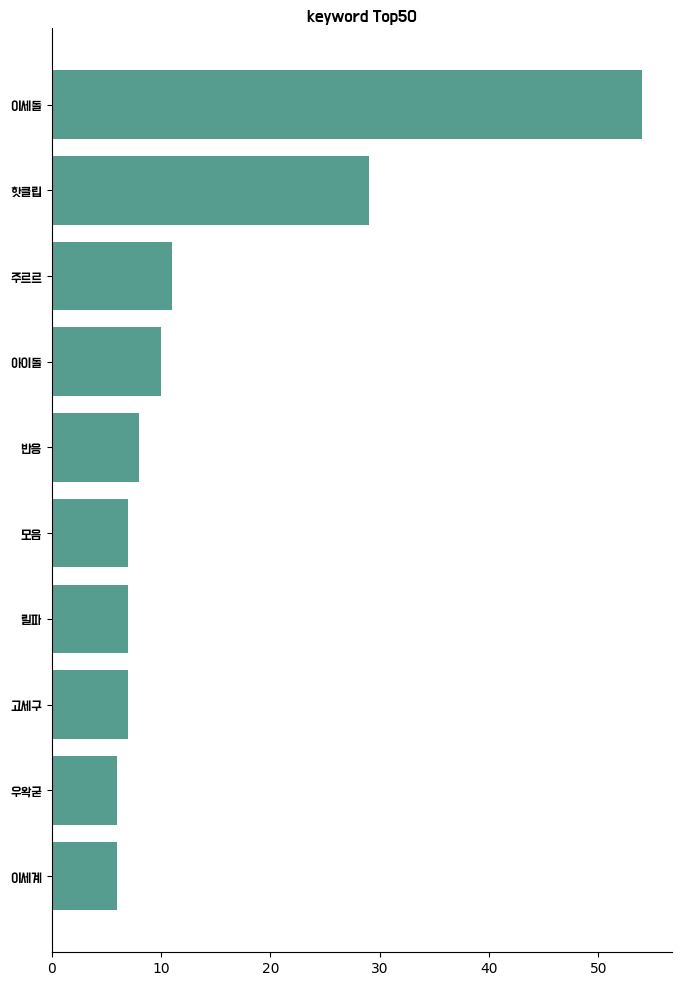

In [ ]:
# #
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = "/content/drive/MyDrive/BMDOHYEON_ttf.ttf"
fontprop = fm.FontProperties(fname=font_path)


def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

words = sorted(tokenizer.word_counts.items(), key=lambda x: x[1])
x = [i[0] for i in words[-10:]]
y = [i[1] for i in words[-10:]]

fig, ax = plt.subplots(figsize=(8, 12))
ax.barh(x, y, color='#569d90')
plt.yticks(fontproperties=fontprop, fontsize=8)  # Ìè∞Ìä∏ ÏÑ§Ï†ïÏùÑ Ï∂îÍ∞Ä
plt.title("keyword Top10", fontproperties=fontprop)  # Ìè∞Ìä∏ ÏÑ§Ï†ïÏùÑ Ï∂îÍ∞Ä
simpleaxis(ax)



### ÎßàÏù∏ÌÅ¨ÎûòÌîÑÌä∏
* ÏàòÏùµ(benefit)ÏúºÎ°ú Î≥¥ÏïòÏùÑÎïåÎÇò Î∞òÏùëÎ©¥ÏúºÎ°ú Î≥¥ÏïòÏùÑÎïåÎÇò Í±¥Ï∂ï ÏΩòÌÖåÏä§Ìä∏, ÏôÅÌååÌä∏, ÎàïÌîÑÎ°ú Ìï¥Ïª§ Í∞ôÏùÄ Ï£ºÏ†úÎì§Ïù¥ ÏµúÏÉÅÏúÑ keywordÏóê Ïò¨ÎùºÍ∞ÄÏûàÎã§.
* ÎßàÏù∏ÌÅ¨ÎûòÌîÑÌä∏Ïóê 'Í≥†Î©§'Ïù¥ÎùºÎäî ÌÇ§ÏõåÎìúÍ∞Ä Îì§Ïñ¥Í∞Ñ Í≤ΩÏö∞, ÎßàÏù∏ÌÅ¨ÎûòÌîÑÌä∏Ïùò ÌèâÍ∑† Ïù¥ÏÉÅÏùò ÎåìÍ∏ÄÏù¥ Îã¨Î¶∞Îã§. üëâ Ï°∞ÌöåÏàòÎÇò ÏàòÏùµÎ©¥ÏóêÏÑú Î∂ÄÏ°±ÌïòÏßÄÎßå 'ÎåìÍ∏Ä' Ïù¥ÎùºÎäî ÏãúÏ≤≠Ïûê Î∞òÏùëÎ©¥ÏóêÏÑú ÍΩ§ ÎÜíÎã§.

### ISEGYE IDOL : YOUTUBE
* (benefit) Ìï´ÌÅ¥Î¶Ω ÏúÑÏ£ºÏùò ÏòÅÏÉÅÏù¥ ÎßéÍ≥†, 'Î∞òÏùë Î™®Ïùå' keyword Îì§Ïùò ÏòÅÏÉÅÏù¥ ÏÉÅÏúÑÍ∂å ÏïàÏóêÏûàÎã§. 'Í∞ôÏù¥ Î≥¥Í∏∞' Í∞ôÏùÄ Ïª®ÌÖêÏ∏†

* (Ï°∞ÌöåÏàò,reaction) Î™®Îì† Ïù¥ÏÑ∏Îèå Î©§Î≤ÑÎ∂ÑÎì§Ïù¥ keyword Ïóê ÏûàÏßÄÎßå ÌäπÌûà, ÎààÏóêÎùÑÍ≤å Î≥¥Ïù¥Îäî keyword Îäî  'Ï£ºÎ•¥Î•¥' 'Í≥†ÏÑ∏Íµ¨' Ïù¥Îã§.



### ÌíÄÏòÅÏÉÅ
* (benefit, Ï°∞ÌöåÏàò , reaction) ÌíÄÏòÅÏÉÅÏùò Í≤ΩÏö∞  vrÏ±ó, Ìï©Î∞©, Í≥†Î©§, ÏÉÅÌô©Í∑π, Í∑∏Î¶¨Í≥† Îß§ÎÖÑÎßàÎã§ Ïú†ÌñâÌÉÄÎäî Í≤åÏûÑ (Ïñ¥Î™ΩÏñ¥Ïä§ Í∞ôÏùÄ)Î•ò Îì§Ïù¥ ÏÉÅÏúÑÍ∂åÏóê ÏûàÏóàÎã§.

> ÏïÑÏâΩÍ≤åÎèÑ Îã§Î•∏ Ïû¨ÏÉùÎ™©Î°ùÎì§ÏùÑ Î≥¥ÏïòÏùÑ Îïå, ÌÇ§ÏõåÎìúÎì§Ïù¥ ÎÇòÏò§Í∏¥ ÌïòÏßÄÎßå, ÎßéÏùÄ ÏñëÏùò ÌÇ§ÏõåÎìúÎ•º Î≥º ÏàòÎäî ÏóÜÏóàÎã§. title Î≥¥Îã§ Ìï¥Îãπ ÏòÅÏÉÅÏùò ÎåìÍ∏ÄÏùÑ Í∞ÄÏ†∏ÏôÄÏïº Îçî Ï†ïÌôïÌïú Î∂ÑÏÑùÏù¥ Í∞ÄÎä•Ìï†Í≤É Í∞ôÎã§.



In [ ]:
df = pd.read_csv('/content/dataset.csv')

In [ ]:
df = df[df['seconds']<=15000]

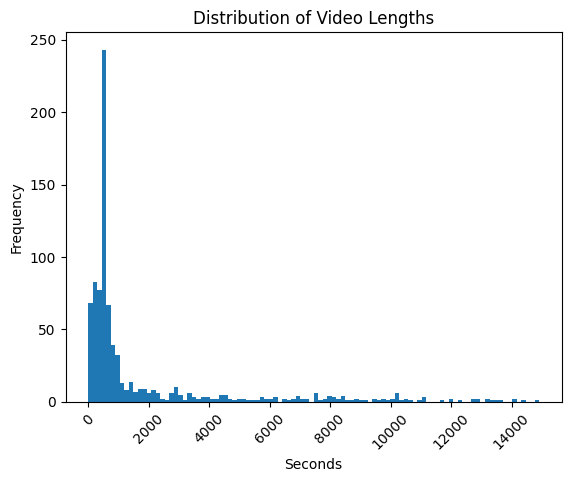

In [ ]:
import matplotlib.pyplot as plt


plt.hist(df[df['year'].isin([2021,2022,2023])]['seconds'], bins=100)
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.title('Distribution of Video Lengths')
plt.xticks(range(0, 15000, 2000),rotation=45)
plt.show()

In [ ]:
mask = ['view_count','like_count','comment_count','seconds','ad_count','ad_benefit','cost','benefit']
df_col= df[mask]

Correlation between seconds and benefit: 0.12248232491930607


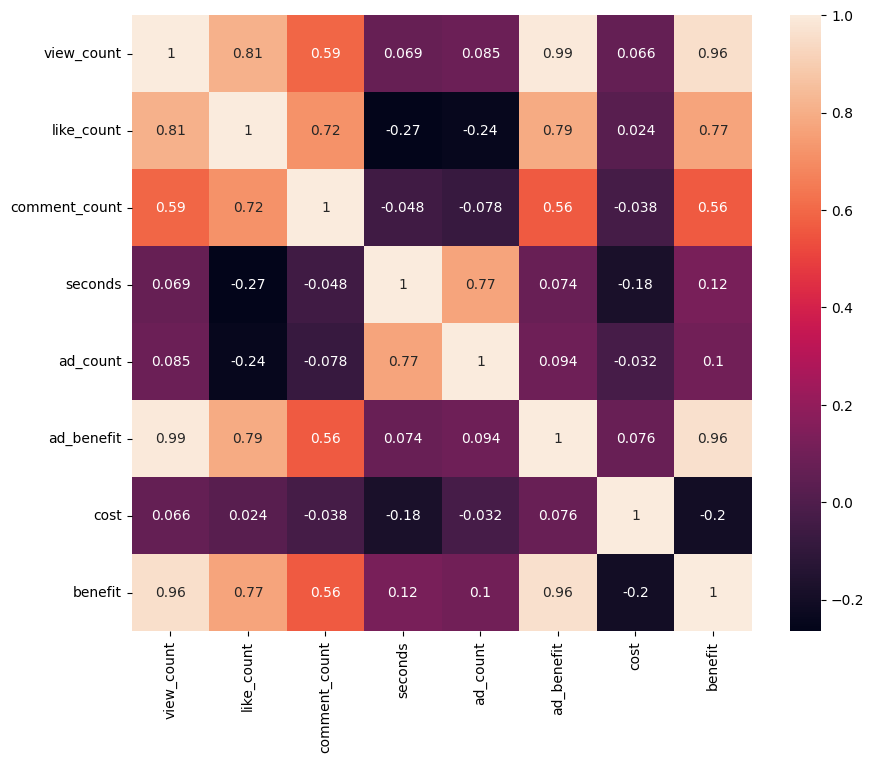

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_col.corr(), annot=True)

correlation = df['seconds'].corr(df['benefit'])
print("Correlation between seconds and benefit:", correlation)


In [ ]:

from pandas.plotting import scatter_matrix

scatter_matrix(df_col, figsize=(8, 8), diagonal='hist', alpha=0.8)
plt.show()


In [ ]:
import scipy.stats as stats
rho, p_val = stats.pearsonr(df_col['seconds'], df_col['benefit'])
print(f"Í≤∞Í≥º: {rho},p-value {p_val}")

Í≤∞Í≥º: 0.12248232491930611,p-value 0.00035889620731041795


### Ï°∞ÌöåÏàò, Ï¢ãÏïÑÏöî, ÎåìÍ∏ÄÏàò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ
* Ïó≠Ïãú ÏÉùÍ∞ÅÌñàÎçò Í≤É Ï≤òÎüº. 'Ï°∞ÌöåÏàò' ,'Ï¢ãÏïÑÏöî', 'ÎåìÍ∏ÄÏàò' ÏàúÏúºÎ°ú ÏàòÏùµÍ≥º ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÎÜíÏïòÎã§.

###  ÏòÅÏÉÅÏùò Í∏∏Ïù¥ÏôÄ ÏàòÏùµÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≤∞Í≥º
* Î®ºÏ†Ä ÏòÅÏÉÅÏùòÍ∏∏Ïù¥Ïùò Í≤ΩÏö∞ Î≥¥ÌÜµ 2000Ï¥à ÏïÑÎûòÏùò
* seconds ÏôÄ benfit ÏùòÍ≤ΩÏö∞ ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∞íÏù¥ 0.1 Î°ú Í∑∏Î†áÍ≤å ÌÅ∞ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÏûàÏßÄÎäî ÏïäÏïòÎã§. p-value 0.0003

# Ïû¨ÏÉùÎ™©Î°ùÎ≥ÑÎ°ú Ï¢ãÏïÑÏöî, ÎåìÍ∏ÄÏàò, ÏàòÏùµÏóê Ï∞®Ïù¥Í∞Ä ÏûàÏùÑ Íπå?


## Ïö∞ÏôÅÍµ≥Í≤åÏûÑÎ∞©ÏÜ° (Î≥∏Ï±ÑÎÑê)
### Ï¢ãÏïÑÏöîÏàò
> ÎÖ∏Í∞ÄÎ¶¨,ÎßàÌÅ¨,Ìï©Î∞©,ÏãúÎ¶¨Ï¶à,Í∏∞ÌÉÄÏª®ÌÖêÏ∏†(Î®πÎ∞©) ÌèâÍ∑† Ï¢ãÏïÑÏöîÏàòÏùò ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÏóàÎã§.

* ÎÖ∏Í∞ÄÎ¶¨ - Îò•Í≤ú, Ìï´ÌÅ¥Î¶Ω Í≥º Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏùå
* Îò•Í≤ú - Î™®Îì† Ïª®ÌÖêÏ∏†ÏôÄ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÎã§. Îò•Í≤úÏùò Í≤ΩÏö∞ ÌèâÍ∑† Ï¢ãÏïÑÏöîÍ∞Ä Îß§Ïö∞ ÎÇÆÏùå.

### ÏàòÏùµ
* "ÎÖ∏Í∞ÄÎ¶¨", "ÎßàÌÅ¨", "Ìï©Î∞©,ÏãúÎ¶¨Ï¶à,Í∏∞ÌÉÄ"Ïùò Í≤ΩÏö∞ ÏàúÏÑúÎåÄÎ°ú top3 Ïóê Ìï¥ÎãπÌïúÎã§. ÏúÑ 3Í∞úÏùò Ïª®ÌÖêÏ∏†Ïùò Í≤ΩÏö∞ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏóÜÏóàÎã§.
* "Îò•Í≤ú"Ïùò Í≤ΩÏö∞, "Ìï´ÌÅ¥Î¶Ω"ÏùÑ Ï†úÏô∏ÌïòÍ≥† ÎÇòÎ®∏ÏßÄ Ïª®ÌÖêÏ∏†ÏôÄ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÎã§. Ïó≠Ïãú Îß§Ïö∞ ÎÇÆÎã§.

### Ïú†Ï†ÄÏùò Î∞òÏùë ÎåìÍ∏ÄÏàò
* "Ìï´ÌÅ¥Î¶Ω"Í≥º "Îò•Í≤ú" (ÌèâÍ∑† ÎåìÍ∏Ä Ïàò ÎÇÆÏùå)
* "ÎÖ∏Í∞ÄÎ¶¨" Ïª®ÌÖêÏ∏†ÏôÄ "Ìï©Î∞©,ÏãúÎ¶¨Ï¶à,Í∏∞ÌÉÄ"  (ÌèâÍ∑† ÎåìÍ∏Ä Ïàò ÎÜíÏùå)
* Îëê case Î•º Ï†úÏô∏ÌïòÍ≥† Î™®Îëê Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏóàÎã§.

>  "ÎßàÌÅ¨" Ïª®ÌÖêÏ∏† Ïùò Í≤ΩÏö∞, Ï¢ãÏïÑÏöî,ÏàòÏùµ Î©¥ÏóêÏÑú ÏÉÅÏúÑÍ∂åÏóê ÏûàÏóàÏßÄÎßå ÏÉùÍ∞ÅÎ≥¥Îã§ "ÎåìÍ∏Ä Ïàò"Í∞Ä ÎÇÆÏïòÎã§.
> "ÎÖ∏Í∞ÄÎ¶¨" Ïª®ÌÖêÏ∏†Ïùò Í≤ΩÏö∞, Î™®Îì† ÏßÄÌëúÎ©¥ÏóêÏÑú ÏÉÅÏúÑÍ∂åÏùÑ Îã¨ÏÑ±ÌïòÍ≥†ÏûàÎã§. Í∞ÄÏû• ÏÇºÍ∞ÅÌòï Ïª®ÌÖêÏ∏†ÎùºÍ≥† Ìï† Ïàò ÏûàÎã§!

Ï°∞ÌöåÏàò, Ï¢ãÏïÑÏöîÍ∞Ä ÎÜíÎã§Í≥† Íº≠ ÎåìÍ∏ÄÏàòÍ∞Ä ÎÜíÎã§ÎùºÍ≥† Î≥¥Ïû•Ìï† ÏàòÎäî ÏóÜÎäîÍ≤É Í∞ôÎã§.

In [ ]:
from scipy.stats import *

df = pd.read_csv('/content/dataset (1).csv')

df = df[~df['playlist_title'].str.contains('MUSIC')]
df.loc[df['playlist_title'].str.contains('ISEGYE | Ïù¥ÏÑ∏Ïó¨Í≥†|OFFICIAL'), 'playlist_title'] = 'ISEGYE IDOL : ÏòàÎä•'
df.loc[df['playlist_title'].str.contains('WAKTAVERSE'), 'playlist_title'] = 'WAKTAVERSE : ÏòàÎä•'

wakta = df[df['channel'] == 'waktaverse'][['playlist_title','seconds','view_count','like_count','comment_count','benefit']]
wakgood = df[df['channel'] =='Ïö∞ÏôÅÍµ≥ÏùòÍ≤åÏûÑÎ∞©ÏÜ°' ][['playlist_title','seconds','view_count','like_count','comment_count','benefit']]

In [9]:
wakgood.loc[wakgood['playlist_title'] == 'Î®πÎ∞©/Ï∫†Î∞©', 'playlist_title'] = 'Ìï©Î∞©,ÏãúÎ¶¨Ï¶à,Í∏∞ÌÉÄ Ïª®ÌÖêÏ∏†'

In [10]:
wakgood = wakgood[wakgood['playlist_title'].str.contains('ÎßàÌÅ¨|Îò•Í≤ú|Ïª®ÌÖêÏ∏†|ÎÖ∏Í∞ÄÎ¶¨|Ìï´ÌÅ¥Î¶Ω')]

In [106]:
group1 = wakgood[wakgood['playlist_title'] == 'Îò•Í≤ú']['like_count']
group2 = wakgood[wakgood['playlist_title'] == 'Ìï©Î∞©,ÏãúÎ¶¨Ï¶à,Í∏∞ÌÉÄ Ïª®ÌÖêÏ∏†']['like_count']
group3 = wakgood[wakgood['playlist_title'] == 'Ìï´ÌÅ¥Î¶Ω,ÌïòÏù¥ÎùºÏù¥Ìä∏']['like_count']
group4 = wakgood[wakgood['playlist_title'] == 'ÎÖ∏Í∞ÄÎ¶¨']['like_count']
group5 = wakgood[wakgood['playlist_title'] == 'ÎßàÌÅ¨']['like_count']


In [23]:
group1 = np.log(group1)

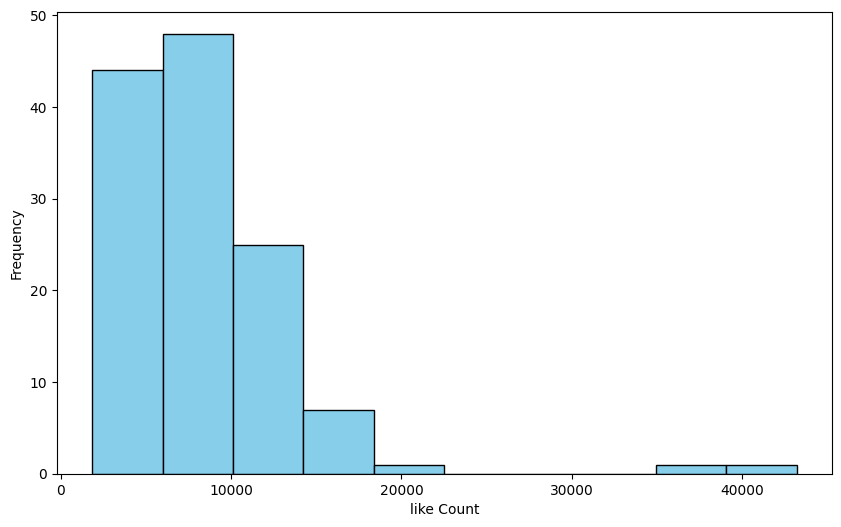

In [71]:
import matplotlib.pyplot as plt

# ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(10, 6))
plt.hist(group1, bins=10, color='skyblue', edgecolor='black')

# Ï†úÎ™©Í≥º Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.xlabel('like Count')
plt.ylabel('Frequency')

# Í∑∏ÎûòÌîÑ Î≥¥Ïó¨Ï£ºÍ∏∞
plt.show()


Ï†ïÍ∑úÏÑ± ÎßåÏ°±

In [73]:
# skewness(=ÏôúÎèÑ)Îäî 2, kurtosis(=Ï≤®ÎèÑ)Îäî 7Î≥¥Îã§ ÏûëÏúºÎ©¥ Ï†ïÍ∑úÎ∂ÑÌè¨ÏóêÏÑú ÌÅ¨Í≤å Î≤óÏñ¥ÎÇòÏßÄ ÏïäÍ≥† Ï†ïÍ∑úÏÑ±ÏùÑ Î≥¥Ïù∏Îã§"
# Ïñ¥ÎäêÏ†ïÎèÑ
def nor (df):
  # Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï Ïã§Ìñâ
  statistic, p_value = normaltest(df)

  # ÏôúÎèÑ(skewness)ÏôÄ Ï≤®ÎèÑ(kurtosis) Ï∂úÎ†•
  skewness = df.skew()
  kurtosis = df.kurtosis()

  # Í≤ÄÏ†ï Í≤∞Í≥º Ï∂úÎ†•
  print(f" Í≤∞Í≥º")
  print("Skewness (ÏôúÎèÑ):", skewness)
  print("fKurtosis (Ï≤®ÎèÑ):", kurtosis)


nor(group1)
nor(group2)
nor(group3)
nor(group4)
nor(group5)


 Í≤∞Í≥º
Skewness (ÏôúÎèÑ): 0.2760095239206248
fKurtosis (Ï≤®ÎèÑ): 1.4639999483109936
 Í≤∞Í≥º
Skewness (ÏôúÎèÑ): 1.4964098982394665
fKurtosis (Ï≤®ÎèÑ): 4.135762731430333
 Í≤∞Í≥º
Skewness (ÏôúÎèÑ): 0.7718367627990781
fKurtosis (Ï≤®ÎèÑ): 0.6648075429951521
 Í≤∞Í≥º
Skewness (ÏôúÎèÑ): 0.6447344839761188
fKurtosis (Ï≤®ÎèÑ): -0.17409690993736593
 Í≤∞Í≥º
Skewness (ÏôúÎèÑ): 1.2990812790008162
fKurtosis (Ï≤®ÎèÑ): 3.8858276526700766


In [74]:
levene_result = levene(group1, group2, group3,group4,group5)
levene_result.pvalue

3.057346851006075e-29

In [75]:
# ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù Ïã§Ìñâ
anova_result = f_oneway(group1, group2, group3,group4,group5)

# ANOVA Í≤∞Í≥º Ï∂úÎ†•
print("ANOVA Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ:", anova_result.statistic)
print("P-value:", round(anova_result.pvalue,3))


ANOVA Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ: 184.197149378667
P-value: 0.0


In [ ]:
# ÏÇ¨ÌõÑ Í≤ÄÏ†ï Ïã§Ìñâ
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(wakgood['like_count'], wakgood['playlist_title'],alpha=0.05)

# ÏÇ¨ÌõÑ Í≤ÄÏ†ï Í≤∞Í≥º Ï∂úÎ†•
print("ÏÇ¨ÌõÑ Í≤ÄÏ†ï Í≤∞Í≥º:")
print(posthoc)


posthoc.plot_simultaneous(xlabel='mean', ylabel='group')
plt.show()



Îì±Î∂ÑÏÇ∞ ÎßåÏ°± ÌïòÏßÄ ÏïäÏùÑÍ≤ΩÏö∞


In [115]:
# Îì±Î∂ÑÏÇ∞ÏÑ± Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞ÅÏãú (Îì±Î∂ÑÏÇ∞ÏÑ± ÎßåÏ°±ÌïòÏßÄ ÏïäÏùå)
# Ïõ∞ÏπòÏä§ Í≤ÄÏ†ï Ïù¥Ïö©
import pingouin as pg

pg.welch_anova(dv = 'comment_count', between = 'playlist_title', data = wakgood)
anova_result = pg.pairwise_gameshowell(dv = 'comment_count', between = 'playlist_title', data = wakgood)

# pval Ïó¥ÏùÑ Î∞òÏò¨Î¶ºÌïòÏó¨ ÏóÖÎç∞Ïù¥Ìä∏
anova_result['pval'] = anova_result['pval'].round(3)

anova_result

A              B      mean(A)      mean(B)        diff  \
0            ÎÖ∏Í∞ÄÎ¶¨             Îò•Í≤ú  1273.228571   790.700787  482.527784   
1            ÎÖ∏Í∞ÄÎ¶¨             ÎßàÌÅ¨  1273.228571   940.041176  333.187395   
2            ÎÖ∏Í∞ÄÎ¶¨  Ìï©Î∞©,ÏãúÎ¶¨Ï¶à,Í∏∞ÌÉÄ Ïª®ÌÖêÏ∏†  1273.228571  1431.677852 -158.449281   
3            ÎÖ∏Í∞ÄÎ¶¨      Ìï´ÌÅ¥Î¶Ω,ÌïòÏù¥ÎùºÏù¥Ìä∏  1273.228571   728.351351  544.877220   
4             Îò•Í≤ú             ÎßàÌÅ¨   790.700787   940.041176 -149.340389   
5             Îò•Í≤ú  Ìï©Î∞©,ÏãúÎ¶¨Ï¶à,Í∏∞ÌÉÄ Ïª®ÌÖêÏ∏†   790.700787  1431.677852 -640.977065   
6             Îò•Í≤ú      Ìï´ÌÅ¥Î¶Ω,ÌïòÏù¥ÎùºÏù¥Ìä∏   790.700787   728.351351   62.349436   
7             ÎßàÌÅ¨  Ìï©Î∞©,ÏãúÎ¶¨Ï¶à,Í∏∞ÌÉÄ Ïª®ÌÖêÏ∏†   940.041176  1431.677852 -491.636676   
8             ÎßàÌÅ¨      Ìï´ÌÅ¥Î¶Ω,ÌïòÏù¥ÎùºÏù¥Ìä∏   940.041176   728.351351  211.689825   
9  Ìï©Î∞©,ÏãúÎ¶¨Ï¶à,Í∏∞ÌÉÄ Ïª®ÌÖêÏ∏†      Ìï´ÌÅ¥Î¶Ω,ÌïòÏù¥ÎùºÏù¥Ìä∏  1431.677852   728.351351  703.326501   

           se         T          df   pval    hedges  
0  109.065767  4.424191   92.369256  0.000  0.768209  
1  106.123129  3.139630   83.674584  0.019  0.574061  
2  126.690259 -1.250682  148.046769  0.722 -0.174245  
3  109.848200  4.960274   90.690173  0.000  0.770441  
4   52.422997 -2.848757  257.735904  0.038 -0.337591  
5   86.812866 -7.383434  223.981375  0.000 -0.847251  
6   59.604355  1.046055  106.071198  0.833  0.145347  
7   83.085803 -5.917216  200.638363  0.000 -0.691906  
8   54.031992  3.917861   82.812608  0.002  0.526793  
9   87.793845  8.011114  181.567137  0.000  0.828908

## ÏôÅÌÉÄÎ≤ÑÏä§

### Waktaverse Ï±ÑÎÑê ÌïµÏã¨
>  "Ïù¥ÏÑ∏Í≥Ñ ÏïÑÏù¥Îèå" ÏòàÎä• ÏòÅÏÉÅÏùò ÌèâÍ∑† Ï¢ãÏïÑÏöî,ÎåìÍ∏Ä,ÏàòÏùµ,Ï°∞ÌöåÏàò Î™®Îëê Í∞ÄÏû• ÎÜíÏïòÏúºÎ©∞, Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÎã§Í≥† Ìï† Ïàò ÏûàÎã§.

> "ÏôÅÌÉÄÎ≤ÑÏä§" Í≥†Î©§ÏòàÎä•Ïùò Í≤ΩÏö∞ "Ïù¥ÏÑ∏Í≥Ñ ÏïÑÏù¥Îèå" ÏòàÎä• ÏòÅÏÉÅÍ≥º ÎπÑÍµêÌñàÏùÑ Îïå, ÌÅ∞Ï∞®Ïù¥Í∞Ä ÎÇòÏßÄ ÏïäÎäî Î∂ÄÎ∂ÑÏùÄ Î∞îÎ°ú "ÎåìÍ∏Ä Ïàò" ÏòÄÎã§. Ïñ¥Ï©åÎ©¥ ÏãúÏ≤≠ÏûêÏùò Î∞òÏùëÏù¥ÎùºÍ≥† Ìï† Ïàò ÏûàÎäî ÎåìÍ∏Ä ÏàòÏóêÏÑú ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÎÇòÏßÄ ÏïäÎäîÎã§.

> "Ïö∞ÏôÅÍµ≥ ÌíÄÏòÅÏÉÅ" Ïùò Í≤ΩÏö∞ ÌíÄÏòÅÏÉÅÏù¥ÎùºÎäî ÌäπÏÑ±ÏÉÅ, Î™®Îì† ÏßÄÌëúÎ©¥ÏóêÏÑú ÎÜíÍ∏∞ ÏâΩÏßÄÏïäÎã§.

"Ïù¥ÏÑ∏Í≥Ñ ÏïÑÏù¥Îèå" Í≥º "ÏôÅÌÉÄÎ≤ÑÏä§" ÏòàÎä• ÏòÅÏÉÅÏùò ÌèâÍ∑† "ÎåìÍ∏Ä Ïàò"Î•º Ï†úÏô∏ÌïòÍ≥† Î™®Îëê Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÏóàÎã§!

In [4]:
from scipy.stats import *

In [ ]:
group_0 = df[df['seconds'] <= 60] # shorts

group_1 = df[(60 < df['seconds']) & (df['seconds'] < 600)]
group_2 = df[df['seconds'] >= 600]

group_3 = df[(600 < df['seconds']) & (df['seconds'] < 1200)]
group_4 = df[df['seconds'] >= 1200]

group_5 = df[df['seconds'] >= 3600]


group_1_data = group_1['benefit']
group_2_data = group_2['benefit']
group_3_data = group_3['benefit']
group_4_data = group_4['benefit']

kruskal_statistic, kruskal_pvalue = kruskal(group_1_data, group_3_data, group_4_data)

print(kruskal_statistic)
print(round(kruskal_pvalue,3))

101.60129985128461
0.0


In [ ]:
# waktaverse
wakta = wakta[wakta['playlist_title'].str.contains('ÏòàÎä•|Ïö∞ÏôÅÍµ≥')]

wakta1 = wakta[wakta['playlist_title']== 'WAKTAVERSE : ÏòàÎä•']['like_count']
wakta2 = wakta[wakta['playlist_title']== 'Ïö∞ÏôÅÍµ≥ ÌíÄÏòÅÏÉÅ']['like_count']
wakta3 = wakta[wakta['playlist_title']== 'ISEGYE IDOL : ÏòàÎä•']['like_count']

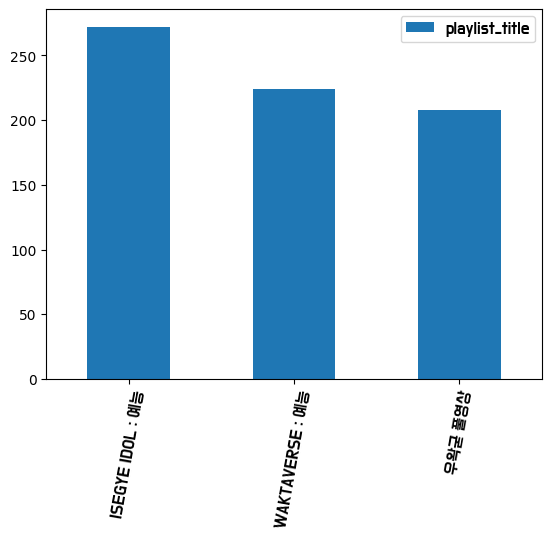

In [44]:
# ÏôÅÌÉÄÎ≤ÑÏä§ Ïû¨ÏÉùÎ™©Î°ùÎ≥Ñ ÏòÅÏÉÅ Ïàò
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.font_manager as f

font_path = "/content/BMDOHYEON_ttf.ttf"
font = fm.FontProperties(fname=font_path)


wakta['playlist_title'].value_counts().plot(kind='bar')

plt.xticks(rotation=80, fontproperties=font)
plt.legend(prop=font)

plt.show()

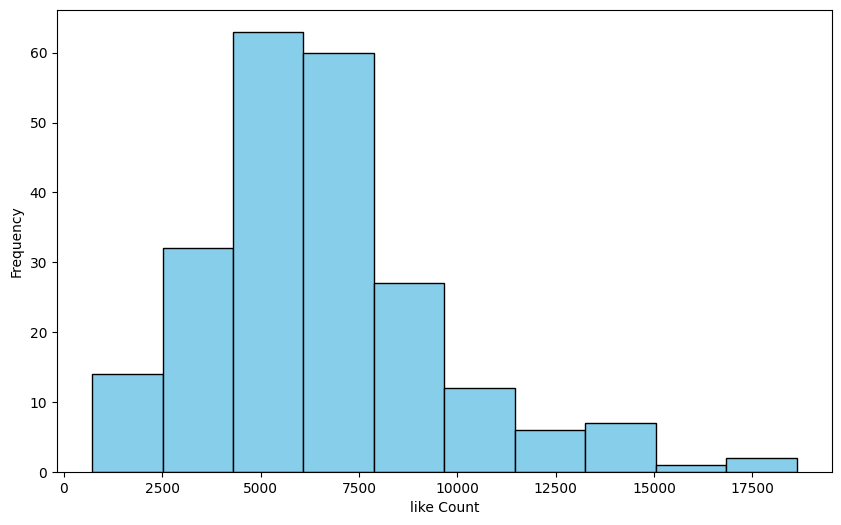

In [77]:
# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨

# ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(10, 6))
plt.hist(wakta1, bins=10, color='skyblue', edgecolor='black')

# Ï†úÎ™©Í≥º Î†àÏù¥Î∏î ÏÑ§Ï†ï
plt.xlabel('like Count')
plt.ylabel('Frequency')

# Í∑∏ÎûòÌîÑ Î≥¥Ïó¨Ï£ºÍ∏∞
plt.show()


In [11]:
wakgood['playlist_title'].unique()

array(['Îò•Í≤ú', 'Ìï©Î∞©,ÏãúÎ¶¨Ï¶à,Í∏∞ÌÉÄ Ïª®ÌÖêÏ∏†', 'Ìï´ÌÅ¥Î¶Ω,ÌïòÏù¥ÎùºÏù¥Ìä∏', 'ÎßàÌÅ¨', 'ÎÖ∏Í∞ÄÎ¶¨'], dtype=object)

In [78]:
# Ï†ïÍ∑úÏÑ± ÌôïÏù∏

# skewness(=ÏôúÎèÑ)Îäî 2, kurtosis(=Ï≤®ÎèÑ)Îäî 7Î≥¥Îã§ ÏûëÏúºÎ©¥ Ï†ïÍ∑úÎ∂ÑÌè¨ÏóêÏÑú ÌÅ¨Í≤å Î≤óÏñ¥ÎÇòÏßÄ ÏïäÍ≥† Ï†ïÍ∑úÏÑ±ÏùÑ Î≥¥Ïù∏Îã§"
# Ïñ¥ÎäêÏ†ïÎèÑ
def nor (df):
  # Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï Ïã§Ìñâ
  statistic, p_value = normaltest(df)

  # ÏôúÎèÑ(skewness)ÏôÄ Ï≤®ÎèÑ(kurtosis) Ï∂úÎ†•
  skewness = df.skew()
  kurtosis = df.kurtosis()

  # Í≤ÄÏ†ï Í≤∞Í≥º Ï∂úÎ†•
  print(f" Í≤∞Í≥º")
  print("Skewness (ÏôúÎèÑ):", skewness)
  print("fKurtosis (Ï≤®ÎèÑ):", kurtosis)


nor(wakta1)
nor(wakta2)
nor(wakta3)


 Í≤∞Í≥º
Skewness (ÏôúÎèÑ): 0.9568052584429088
fKurtosis (Ï≤®ÎèÑ): 1.4510527749259738
 Í≤∞Í≥º
Skewness (ÏôúÎèÑ): 4.593269360177928
fKurtosis (Ï≤®ÎèÑ): 35.745554367646406
 Í≤∞Í≥º
Skewness (ÏôúÎèÑ): 1.8956483693983797
fKurtosis (Ï≤®ÎèÑ): 10.398702458268641


In [80]:
# Îì±Î∂ÑÏÇ∞ÏÑ± ÌôïÏù∏
levene_result = levene(wakta1, wakta2, wakta3)
levene_result.pvalue


8.129669055370751e-16

In [86]:
# Îì±Î∂ÑÏÇ∞ÏÑ± Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉùÏãú
# ÏùºÏõêÎ∂ÑÏÇ∞Î∂ÑÏÑù Ïã§Ìñâ
anova_result = f_oneway(wakta1,wakta2, wakta3)

# ANOVA Í≤∞Í≥º Ï∂úÎ†•
print("ANOVA Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ:", anova_result.statistic)
print("P-value:", round(anova_result.pvalue,3))



ANOVA Í≤ÄÏ†ï ÌÜµÍ≥ÑÎüâ: 258.77154719673615
P-value: 0.0


In [ ]:
# ANOVA Ïù¥ÌõÑ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÎã§Î©¥.
# ÏÇ¨ÌõÑ Í≤ÄÏ†ï Ïã§Ìñâ
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(wakgood['like_count'], wakgood['playlist_title'],alpha=0.05)

# ÏÇ¨ÌõÑ Í≤ÄÏ†ï Í≤∞Í≥º Ï∂úÎ†•
print("ÏÇ¨ÌõÑ Í≤ÄÏ†ï Í≤∞Í≥º:")
print(posthoc)


posthoc.plot_simultaneous(xlabel='mean', ylabel='group')
plt.show()

In [ ]:
!pip install pingouin

In [105]:
# Îì±Î∂ÑÏÇ∞ÏÑ± Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞ÅÏãú (Îì±Î∂ÑÏÇ∞ÏÑ± ÎßåÏ°±ÌïòÏßÄ ÏïäÏùå)
# Ïõ∞ÏπòÏä§ Í≤ÄÏ†ï Ïù¥Ïö©
import pingouin as pg

pg.welch_anova(dv = 'view_count', between = 'playlist_title', data = wakta)
anova_result= pg.pairwise_gameshowell(dv = 'view_count', between = 'playlist_title', data = wakta)

# pval Ïó¥ÏùÑ Î∞òÏò¨Î¶ºÌïòÏó¨ ÏóÖÎç∞Ïù¥Ìä∏
anova_result['pval'] = anova_result['pval'].round(3)

anova_result

A                B        mean(A)        mean(B)  \
0  ISEGYE IDOL : ÏòàÎä•  WAKTAVERSE : ÏòàÎä•  385478.113971  308521.566964   
1  ISEGYE IDOL : ÏòàÎä•          Ïö∞ÏôÅÍµ≥ ÌíÄÏòÅÏÉÅ  385478.113971  193489.865385   
2   WAKTAVERSE : ÏòàÎä•          Ïö∞ÏôÅÍµ≥ ÌíÄÏòÅÏÉÅ  308521.566964  193489.865385   

            diff            se         T          df   pval    hedges  
0   76956.547006  21584.727484  3.565324  477.240130  0.001  0.309864  
1  191988.248586  22174.562267  8.658040  474.717591  0.000  0.760871  
2  115031.701580  18961.684158  6.066534  424.944561  0.000  0.583889